In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/fatal-police-shootings-data.csv")
print(df)

        id        date threat_type flee_status          armed_with  \
0        3  2015-01-02       point         not                 gun   
1        4  2015-01-02       point         not                 gun   
2        5  2015-01-03        move         not             unarmed   
3        8  2015-01-04       point         not             replica   
4        9  2015-01-04       point         not               other   
...    ...         ...         ...         ...                 ...   
8815  9550  2023-10-27        move         NaN               knife   
8816  9551  2023-10-28       shoot         NaN                 gun   
8817  9552  2023-10-30      threat         NaN                 gun   
8818  9554  2023-11-01      attack         NaN               knife   
8819  9553  2023-11-02        move        foot  blunt_object;knife   

                city                county state   latitude   longitude  \
0            Shelton                 Mason    WA  47.246826 -123.121592   
1        

In [ ]:
# checking the missingn values
import pandas as pd
df = pd.read_csv('/content/fatal-police-shootings-data.csv')
missing_values = df.isnull().sum()
print(missing_values)

id                               0
date                             0
threat_type                     47
flee_status                   1206
armed_with                     210
city                            62
county                        4856
state                            0
latitude                      1000
longitude                     1000
location_precision            1000
name                           514
age                            563
gender                          38
race                          1350
race_source                   1319
was_mental_illness_related       0
body_camera                      0
agency_ids                       0
dtype: int64


In [ ]:
df_cleaned = df.dropna()
print(df_cleaned)

df['age'].fillna(df['age'].mean(), inplace=True)
print(df)

        id        date threat_type flee_status armed_with           city  \
0        3  2015-01-02       point         not        gun        Shelton   
1        4  2015-01-02       point         not        gun          Aloha   
2        5  2015-01-03        move         not    unarmed        Wichita   
3        8  2015-01-04       point         not    replica  San Francisco   
4        9  2015-01-04       point         not      other          Evans   
...    ...         ...         ...         ...        ...            ...   
8799  9533  2023-10-16       shoot         not        gun     New Castle   
8800  9534  2023-10-16       point         not        gun       Hartford   
8802  9545  2023-10-16      threat         not        gun    Wallingford   
8805  9539  2023-10-19       shoot        foot        gun     Washington   
8813  9548  2023-10-23      threat        foot        gun    San Antonio   

             county state   latitude   longitude location_precision  \
0             Ma

In [ ]:
#categorical column of "race"
df['race'].fillna(df['race'].mode()[0], inplace=True)
print(df)
#categorical column of "flee"
df['flee_status'].fillna(df['flee_status'].mode()[0], inplace=True)
print(df)

        id        date threat_type flee_status          armed_with  \
0        3  2015-01-02       point         not                 gun   
1        4  2015-01-02       point         not                 gun   
2        5  2015-01-03        move         not             unarmed   
3        8  2015-01-04       point         not             replica   
4        9  2015-01-04       point         not               other   
...    ...         ...         ...         ...                 ...   
8815  9550  2023-10-27        move         NaN               knife   
8816  9551  2023-10-28       shoot         NaN                 gun   
8817  9552  2023-10-30      threat         NaN                 gun   
8818  9554  2023-11-01      attack         NaN               knife   
8819  9553  2023-11-02        move        foot  blunt_object;knife   

                city                county state   latitude   longitude  \
0            Shelton                 Mason    WA  47.246826 -123.121592   
1        

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id                               0
date                             0
threat_type                     47
flee_status                      0
armed_with                     210
city                            62
county                        4856
state                            0
latitude                      1000
longitude                     1000
location_precision            1000
name                           514
age                              0
gender                          38
race                             0
race_source                   1319
was_mental_illness_related       0
body_camera                      0
agency_ids                       0
dtype: int64


In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, date, threat_type, flee_status, armed_with, city, county, state, latitude, longitude, location_precision, name, age, gender, race, race_source, was_mental_illness_related, body_camera, agency_ids]
Index: []


In [ ]:
#checking the data formats
data_formats = df.dtypes
print(data_formats)

id                              int64
date                           object
threat_type                    object
flee_status                    object
armed_with                     object
city                           object
county                         object
state                          object
latitude                      float64
longitude                     float64
location_precision             object
name                           object
age                           float64
gender                         object
race                           object
race_source                    object
was_mental_illness_related       bool
body_camera                      bool
agency_ids                     object
dtype: object


In [ ]:
#data descriptive
summary_stats = df.describe()
print(summary_stats)

                id     latitude     longitude          age
count  8820.000000  7820.000000  7.820000e+03  8820.000000
mean   4856.995465    36.637438 -1.151813e+12    37.285455
std    2749.588394     5.345354  1.018557e+14    12.559491
min       3.000000    19.497503 -9.007175e+15     2.000000
25%    2474.750000    33.466244 -1.120132e+02    28.000000
50%    4887.500000    36.078188 -9.424055e+01    36.000000
75%    7235.250000    39.998813 -8.316906e+01    45.000000
max    9585.000000    71.301255 -6.786717e+01    92.000000


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/fatal-police-shootings-data.csv')

# Choose the column you want to check for outliers
column_name = 'age'

# Calculate the IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Print the rows with outliers
print(outliers)


        id        date threat_type flee_status    armed_with           city  \
19      38  2015-01-09       shoot         not           gun        England   
29      52  2015-01-14      attack         not         knife     Old Bridge   
92     554  2015-02-07       point         not           gun       Gastonia   
126    255  2015-02-20       point         not           gun     Birmingham   
275    357  2015-04-12      threat         not         knife  Oklahoma City   
...    ...         ...         ...         ...           ...            ...   
8474  9216  2023-05-13       point         NaN           gun         Senoia   
8481  9230  2023-05-17       shoot         not           gun         Mequon   
8537  9283  2023-06-11      threat         not           gun     Cape Coral   
8563  9277  2023-06-24       point         not           gun        Weirton   
8692  9411  2023-08-09         NaN         not  undetermined          Provo   

         county state   latitude   longitude locati

<ipython-input-11-8afd3b870008>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


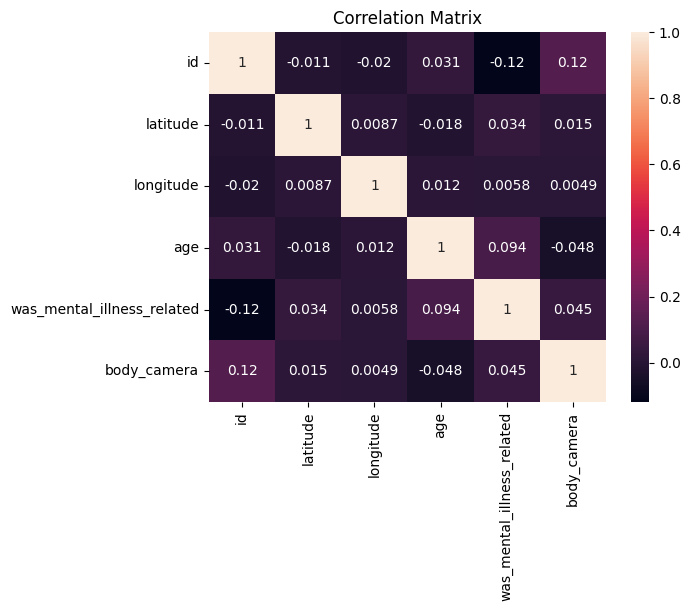

In [ ]:
# correlation Analysis
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


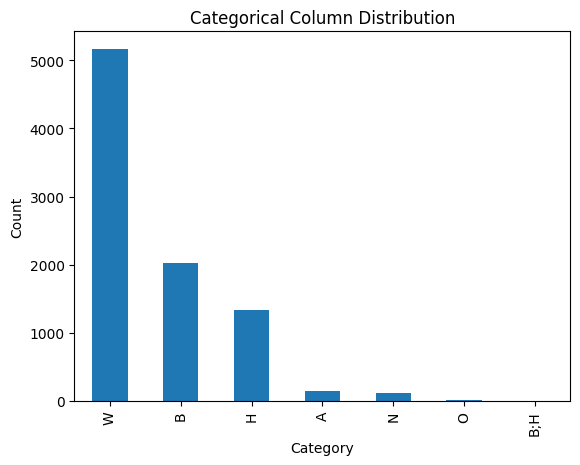

KeyError: ignored

In [ ]:
# Example of a bar chart for a categorical column
df['race'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categorical Column Distribution')
plt.show()

# Example of a bar chart for a categorical column
df['manner_of_death'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categorical Column Distribution')
plt.show()



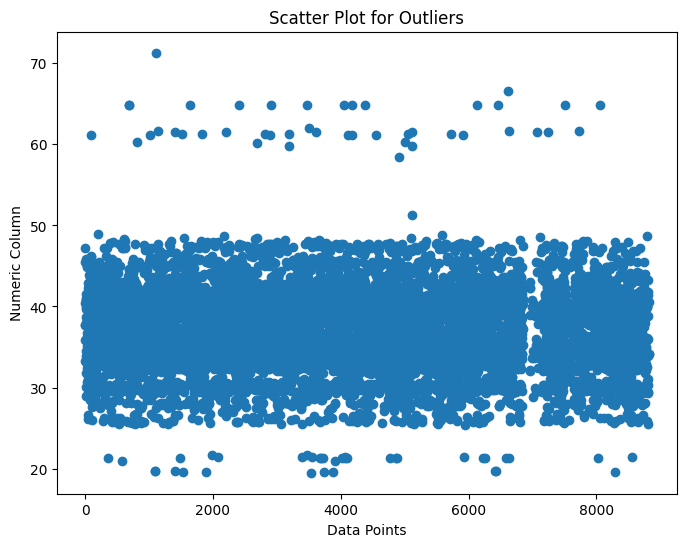

In [ ]:
#Scatter Plot for Outliers
import matplotlib.pyplot as plt

# Create a scatter plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['longitude'])), df['latitude'])
plt.title('Scatter Plot for Outliers')
plt.xlabel('Data Points')
plt.ylabel('Numeric Column')
plt.show()


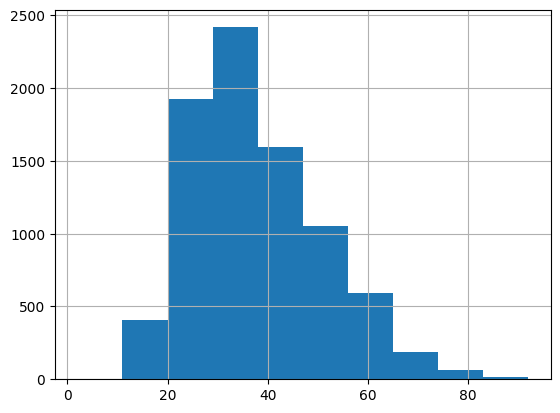

In [ ]:
#numeric column
import matplotlib.pyplot as plt
df['age'].hist()
plt.show()

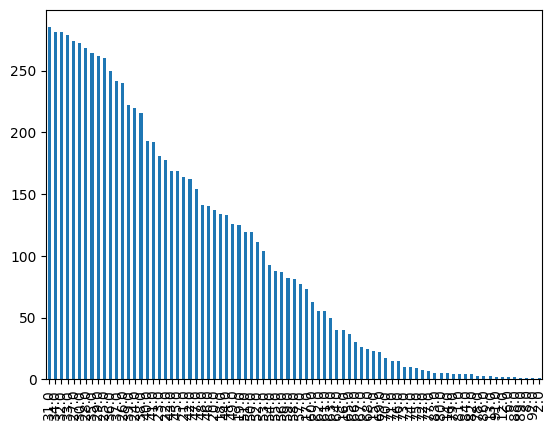

In [ ]:
#categorical column
df['age'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [ ]:
#check null values in the data
print(df.isna().any())

id                            False
date                          False
threat_type                    True
flee_status                    True
armed_with                     True
city                           True
county                         True
state                         False
latitude                       True
longitude                      True
location_precision             True
name                           True
age                            True
gender                         True
race                           True
race_source                    True
was_mental_illness_related    False
body_camera                   False
agency_ids                    False
dtype: bool


In [ ]:
df.describe()

,id,latitude,longitude,age
count,8820.000000,7820.000000,7.820000e+03,8257.000000
mean,4856.995465,36.637438,-1.151813e+12,37.285455
std,2749.588394,5.345354,1.018557e+14,12.980663
min,3.000000,19.497503,-9.007175e+15,2.000000
25%,2474.750000,33.466244,-1.120132e+02,28.000000
50%,4887.500000,36.078188,-9.424055e+01,35.000000
75%,7235.250000,39.998813,-8.316906e+01,45.000000
max,9585.000000,71.301255,-6.786717e+01,92.000000


In [ ]:
#To check Null values in dtype: bool
df = pd.DataFrame(df)
df.dropna()
print(df.isna().any())
print(df)

id                            False
date                          False
threat_type                    True
flee_status                    True
armed_with                     True
city                           True
county                         True
state                         False
latitude                       True
longitude                      True
location_precision             True
name                           True
age                            True
gender                         True
race                           True
race_source                    True
was_mental_illness_related    False
body_camera                   False
agency_ids                    False
dtype: bool
        id        date threat_type flee_status          armed_with  \
0        3  2015-01-02       point         not                 gun   
1        4  2015-01-02       point         not                 gun   
2        5  2015-01-03        move         not             unarmed   
3        8  2015-01-04  

In [ ]:
import pandas as pd
data = pd.read_csv('/content/fatal-police-shootings-data.csv')
columns = df.race
dataframe = df.data()
print(columns)

AttributeError: ignored

In [ ]:
print(df.isna().any())


id                         False
name                        True
date                       False
manner_of_death            False
armed                       True
age                         True
gender                      True
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
longitude                   True
latitude                    True
is_geocoding_exact         False
dtype: bool


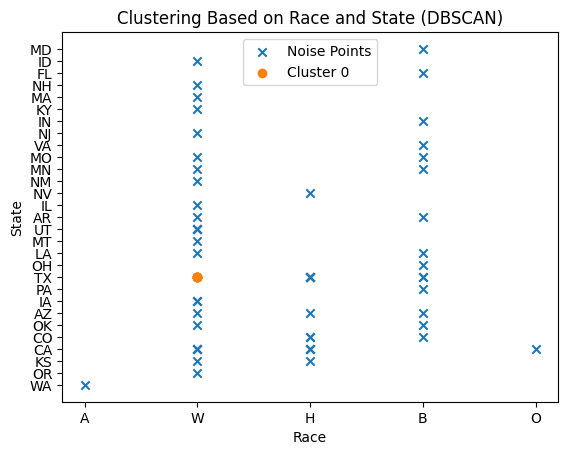

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Create a DataFrame with the provided race and state data
data = pd.DataFrame({
    'Race': [
        'A', 'W', 'H', 'W', 'H', 'W', 'H', 'W', 'W', 'B', 'W', 'B', 'B', 'W', 'B',
        'W', 'W', 'B', 'W', 'W', 'H', 'W', 'H', 'H', 'W', 'W', 'B', 'W', 'B', 'W',
        'W', 'W', 'B', 'B', 'W', 'H', 'W', 'W', 'O', 'B', 'H', 'H', 'W', 'W', 'W',
        'B', 'W', 'H', 'B', 'W', 'B', 'W', 'B', 'H', 'W', 'W', 'B', 'W', 'H'
    ],
    'State': [
        'WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'KS', 'IA', 'PA', 'CA', 'TX', 'OH',
        'IA', 'LA', 'MT', 'UT', 'AR', 'UT', 'AR', 'TX', 'IL', 'CA', 'NV', 'NM', 'TX',
        'MN', 'MO', 'VA', 'NJ', 'TX', 'UT', 'IN', 'CO', 'MN', 'CA', 'LA', 'TX', 'CA',
        'OK', 'CA', 'TX', 'AZ', 'KY', 'MA', 'AZ', 'CA', 'TX', 'MO', 'NH', 'TX', 'TX',
        'FL', 'TX', 'TX', 'ID', 'MD', 'TX', 'CO'
    ]
})

#DBSCAN clustering
# Encode categorical variables
label_encoder_race = LabelEncoder()
label_encoder_state = LabelEncoder()
data['Race'] = label_encoder_race.fit_transform(data['Race'])
data['State'] = label_encoder_state.fit_transform(data['State'])

# Prepare data for clustering
X = data[['Race', 'State']].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust the parameters as needed
data['Cluster'] = dbscan.fit_predict(X)

# Inverse transform the label encoding for visualization
data['Race'] = label_encoder_race.inverse_transform(data['Race'])
data['State'] = label_encoder_state.inverse_transform(data['State'])

# Visualize the clusters
unique_clusters = data['Cluster'].unique()
for i in unique_clusters:
    if i == -1:  # Noise points
        cluster_data = data[data['Cluster'] == i]
        plt.scatter(cluster_data['Race'], cluster_data['State'], label='Noise Points', marker='x')
    else:
        cluster_data = data[data['Cluster'] == i]
        plt.scatter(cluster_data['Race'], cluster_data['State'], label=f'Cluster {i}')

plt.xlabel('Race')
plt.ylabel('State')
plt.title('Clustering Based on Race and State (DBSCAN)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


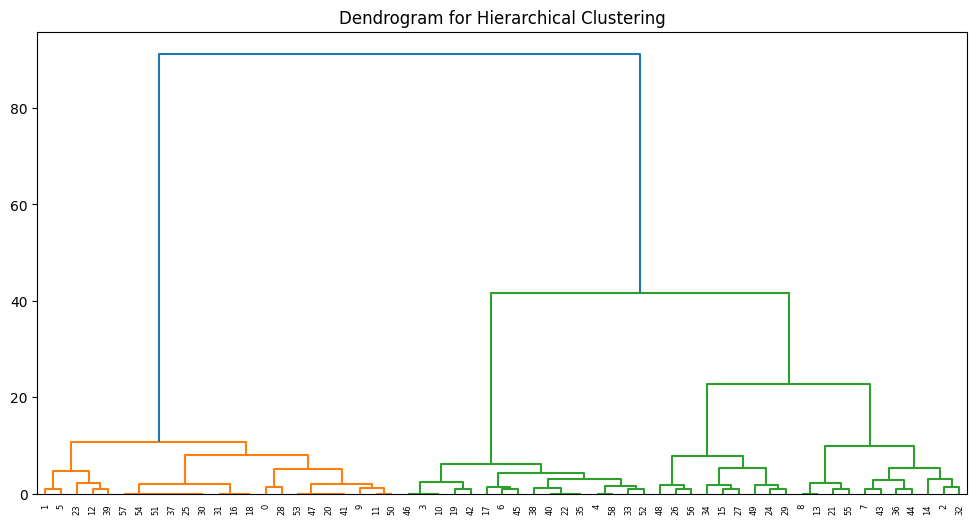

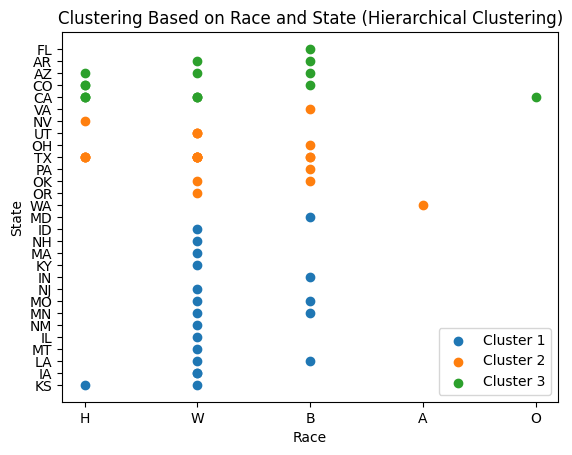

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Create a DataFrame with the provided race and state data
data = pd.DataFrame({
    'Race': [
        'A', 'W', 'H', 'W', 'H', 'W', 'H', 'W', 'W', 'B', 'W', 'B', 'B', 'W', 'B',
        'W', 'W', 'B', 'W', 'W', 'H', 'W', 'H', 'H', 'W', 'W', 'B', 'W', 'B', 'W',
        'W', 'W', 'B', 'B', 'W', 'H', 'W', 'W', 'O', 'B', 'H', 'H', 'W', 'W', 'W',
        'B', 'W', 'H', 'B', 'W', 'B', 'W', 'B', 'H', 'W', 'W', 'B', 'W', 'H'
    ],
    'State': [
        'WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'KS', 'IA', 'PA', 'CA', 'TX', 'OH',
        'IA', 'LA', 'MT', 'UT', 'AR', 'UT', 'AR', 'TX', 'IL', 'CA', 'NV', 'NM', 'TX',
        'MN', 'MO', 'VA', 'NJ', 'TX', 'UT', 'IN', 'CO', 'MN', 'CA', 'LA', 'TX', 'CA',
        'OK', 'CA', 'TX', 'AZ', 'KY', 'MA', 'AZ', 'CA', 'TX', 'MO', 'NH', 'TX', 'TX',
        'FL', 'TX', 'TX', 'ID', 'MD', 'TX', 'CO'
    ]
})

# Kmeans clustering
# Encode categorical variables
label_encoder_race = LabelEncoder()
label_encoder_state = LabelEncoder()
data['Race'] = label_encoder_race.fit_transform(data['Race'])
data['State'] = label_encoder_state.fit_transform(data['State'])

# Prepare data for hierarchical clustering
X = data[['Race', 'State']].values

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')
n_clusters = 3  # Adjust the number of clusters as needed
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
data['Cluster'] = hierarchical.fit_predict(X)

# Inverse transform the label encoding for visualization
data['Race'] = label_encoder_race.inverse_transform(data['Race'])
data['State'] = label_encoder_state.inverse_transform(data['State'])

# Visualize the clusters using a dendrogram (optional)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Visualize the clusters
for i in range(n_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Race'], cluster_data['State'], label=f'Cluster {i + 1}')

plt.xlabel('Race')
plt.ylabel('State')
plt.title('Clustering Based on Race and State (Hierarchical Clustering)')
plt.legend()
plt.show()


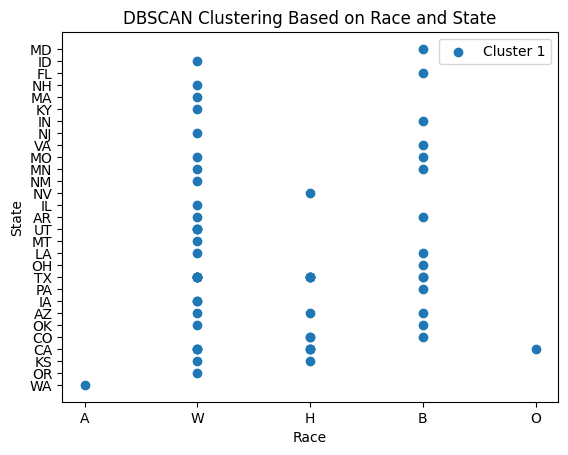

In [ ]:
from sklearn.cluster import DBSCAN

# Create DBSCAN instance
# Adjust eps and min_samples as needed
dbscan = DBSCAN(eps=3, min_samples=2)

# Fit the DBSCAN model
data['Cluster'] = dbscan.fit_predict(X)

# Visualize the clusters including outliers
unique_clusters = set(data['Cluster'])
for cluster in unique_clusters:
    cluster_data = data[data['Cluster'] == cluster]
    if cluster == -1:
        # Outliers can be plotted with a different marker or color
        plt.scatter(cluster_data['Race'], cluster_data['State'], label='Outliers', marker='x')
    else:
        plt.scatter(cluster_data['Race'], cluster_data['State'], label=f'Cluster {cluster + 1}')

plt.xlabel('Race')
plt.ylabel('State')
plt.title('DBSCAN Clustering Based on Race and State')
plt.legend()
plt.show()


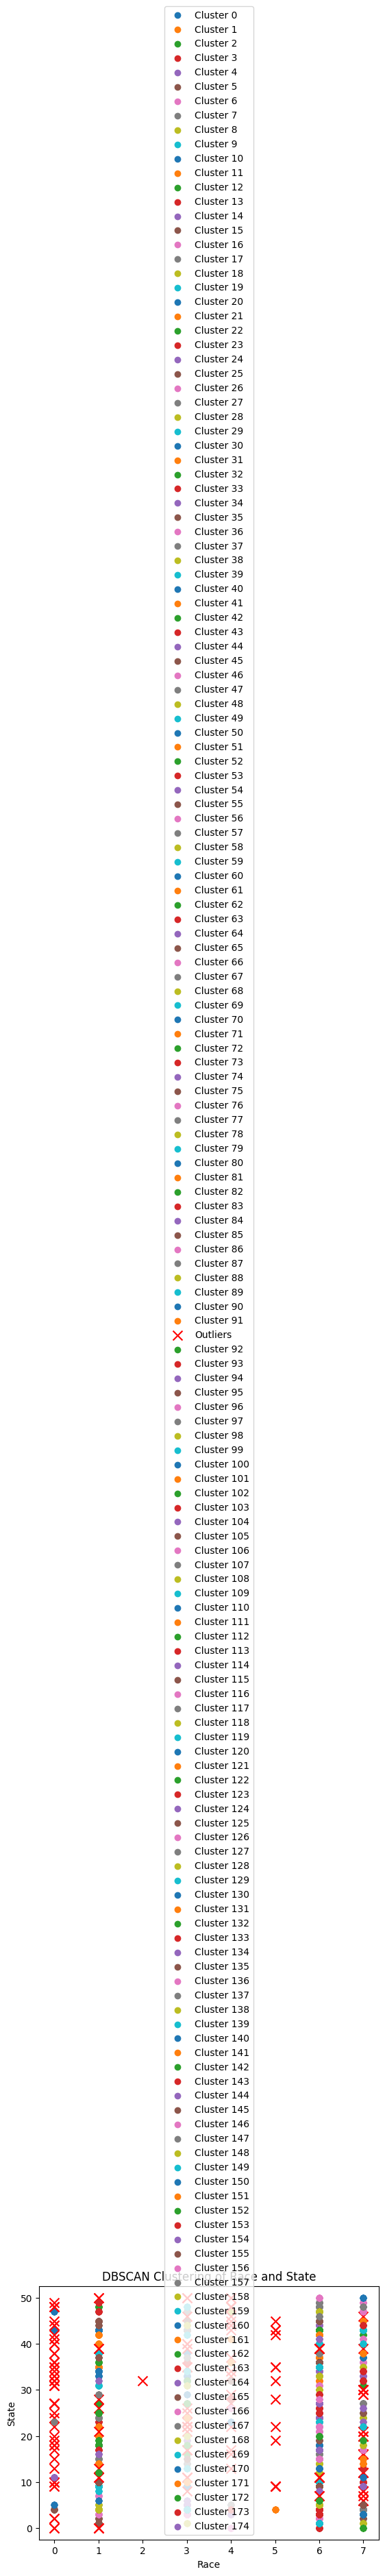

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your data from an Excel file
data = pd.read_csv('/content/fatal-police-shootings-data.csv')  # Replace with your file path

# Assume 'Race' and 'State' columns exist in your Excel file
# If they have different names, replace 'Race' and 'State' with the actual column names

# Encode categorical variables
label_encoder_race = LabelEncoder()
label_encoder_state = LabelEncoder()
data['race_encoded'] = label_encoder_race.fit_transform(data['race'])
data['state_encoded'] = label_encoder_state.fit_transform(data['state'])

# Prepare data for clustering
X = data[['race_encoded', 'state_encoded']].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
data['Cluster'] = dbscan.fit_predict(X)

# Plot the clusters and outliers
unique_clusters = data['Cluster'].unique()
for cluster in unique_clusters:
    if cluster == -1:  # Cluster -1 represents outliers
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(
            cluster_data['race_encoded'], cluster_data['state_encoded'], label=f'Outliers',
            color='red', marker='x', s=100  # Change color to red and use a large 'x' marker
        )
    else:
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(cluster_data['race_encoded'], cluster_data['state_encoded'], label=f'Cluster {cluster}')

plt.xlabel('Race')
plt.ylabel('State')
plt.title('DBSCAN Clustering of Race and State')
plt.legend()
plt.show()


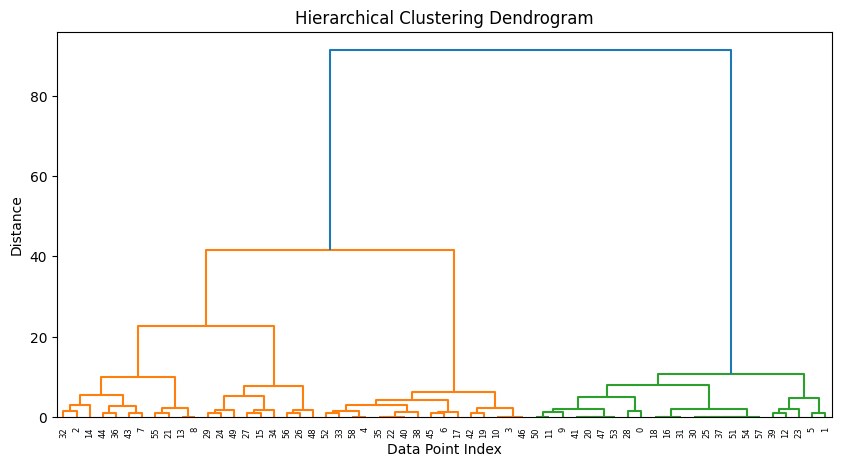

In [ ]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


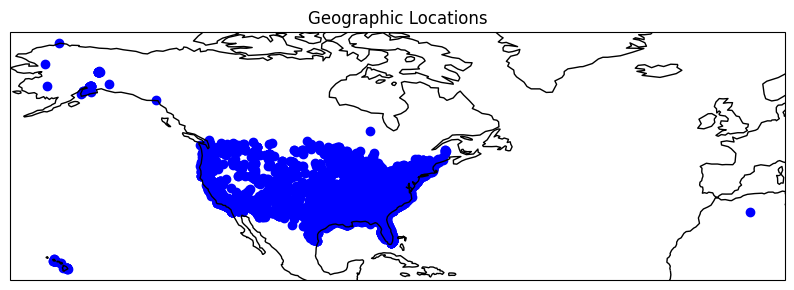

In [ ]:
import folium
import cartopy.crs as ccrs
# Create a base map
locations = list(zip(df['latitude'], df['longitude']))
lats = [lat for lat, _ in locations]
lons = [lon for _, lon in locations]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
ax.scatter(lons, lats, c='blue', marker='o')
ax.coastlines()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Geographic Locations')
plt.show()

Maximum Age 92.0
Minimum Age 2.0
mean of Age 37.285454765653384
standard deviation of Age 12.980662529289173
Median Age 35.0
kurtosis of Age 0.24011740419205996
skewness of Age 0.726172129978411


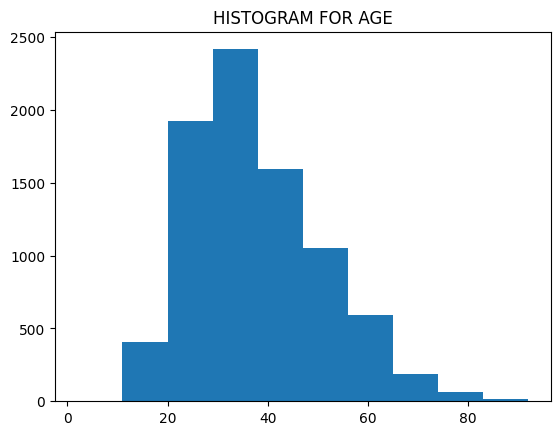

In [ ]:
from numpy import median
from numpy.core.fromnumeric import mean
##Age distribution for people killed by police

allAges=df["age"]
# Descriptive Statistics for AGE DATA.
max_Age=allAges.max()
min_Age=allAges.min()
mean_allAges = allAges.mean()
median_allAges = allAges.median()
std_dev_allAges=allAges.std()
kurtosis_allAges=allAges.kurtosis()
print("Maximum Age",max_Age)
print("Minimum Age",min_Age)
print("mean of Age",mean_allAges)
print("standard deviation of Age",std_dev_allAges)
print("Median Age",median_allAges)
print("kurtosis of Age",kurtosis_allAges)
print("skewness of Age",allAges.skew())

#Plotting Histogram
plt.hist(allAges)
plt.title("HISTOGRAM FOR AGE")
plt.show()

In [ ]:
agedistribution=df[['age','gender','race']]

# Using a boolean mask to filter the DataFrame for black people's ages
black_ages = agedistribution[agedistribution['race'] == 'B']['age']

# Using a boolean mask to filter the DataFrame for white people's ages
white_ages = agedistribution[agedistribution['race'] == 'W']['age']

print("Ages of black people:", black_ages)
print("Ages of white people:", white_ages)

Ages of black people: 9       47.0
11      31.0
12      41.0
14      37.0
17      36.0
        ... 
8785    44.0
8786    41.0
8800    44.0
8803    53.0
8805    33.0
Name: age, Length: 2031, dtype: float64
Ages of white people: 1       47.0
3       32.0
5       18.0
7       35.0
8       34.0
        ... 
8799    59.0
8801    35.0
8802    62.0
8809    24.0
8818    27.0
Name: age, Length: 3814, dtype: float64


Descriptive statistics of the distribution of ages for black people
Maximum Age 88.0
Minimum Age 8.0
mean of Age 32.99899142713061
standard deviation of Age 11.453543201042658
Median Age 31.0
kurtosis of Age 0.8622643324497616
skewness of Age 0.9581948659842209


Descriptive statistics of the distribution of ages for white people
Maximum Age 91.0
Minimum Age 2.0
mean of Age 40.196642685851316
standard deviation of Age 13.145678731904734
Median Age 38.0
kurtosis of Age -0.09179403359817284
skewness of Age 0.5366708974598733


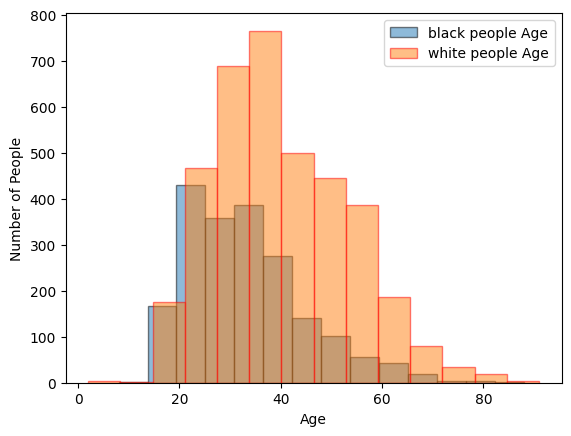

In [ ]:
print("Descriptive statistics of the distribution of ages for black people")
max_Bage=black_ages.max()
min_Bage=black_ages.min()
mean_Bage = black_ages.mean()
median_Bage = black_ages.median()
std_dev_Bage=black_ages.std()
kurtosis_Bage=black_ages.kurtosis()
print("Maximum Age",max_Bage)
print("Minimum Age",min_Bage)
print("mean of Age",mean_Bage)
print("standard deviation of Age",std_dev_Bage)
print("Median Age",median_Bage)
print("kurtosis of Age",kurtosis_Bage)
print("skewness of Age",black_ages.skew())
print("\n")
print("Descriptive statistics of the distribution of ages for white people")
max_Wage=white_ages.max()
min_Wage=white_ages.min()
mean_Wage = white_ages.mean()
median_Wage = white_ages.median()
std_dev_Wage=white_ages.std()
kurtosis_Wage=white_ages.kurtosis()
print("Maximum Age",max_Wage)
print("Minimum Age",min_Wage)
print("mean of Age",mean_Wage)
print("standard deviation of Age",std_dev_Wage)
print("Median Age",median_Wage)
print("kurtosis of Age",kurtosis_Wage)
print("skewness of Age",white_ages.skew())


#Plotting Histogram
plt.hist(black_ages, edgecolor='black',alpha=0.5, label='black people Age',bins=14)
plt.hist(white_ages, edgecolor='red',alpha=0.5, label='white people Age',bins=14)
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.legend(loc='upper right')
plt.show()


<ipython-input-29-566e100cd583>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_age_per_race=agedistribution.groupby('race').mean()


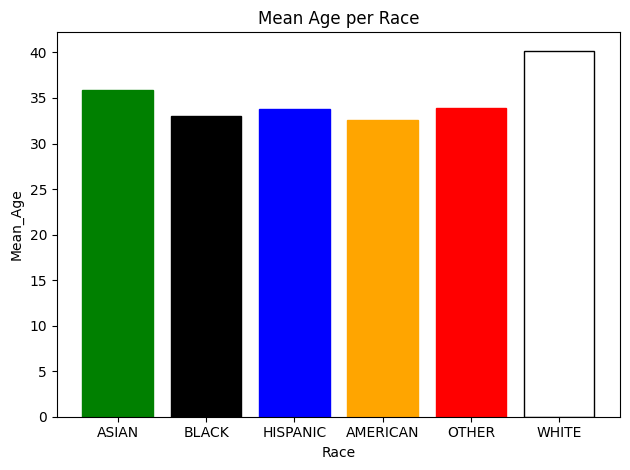

In [ ]:
##Mean Age Per Race
mean_age_per_race=agedistribution.groupby('race').mean()
# Load the data
Race = ['ASIAN', 'BLACK', 'HISPANIC', 'AMERICAN', 'OTHER', 'WHITE']
Mean_Age = [35.862069, 32.998991, 33.749038, 32.594595, 33.909091, 40.196643]

# Create the bar chart
plt.bar(Race, Mean_Age, color=['green', 'black','blue','orange','red','white'],edgecolor=['green', 'black','blue','orange','red','black'])

# Add labels and title to the chart
plt.xlabel('Race')
plt.ylabel('Mean_Age')
plt.title('Mean Age per Race')

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
##Implement logistic regression to predict people shot were mentally-ill based on race,threat_type,age and gender
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting the specified columns
X = df[['race', 'threat_type','age','gender']]
y = df['was_mental_illness_related']

# Preprocessing: One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['race', 'threat_type','age','gender'])
    ])

# Creating a pipeline that first transforms the data and then applies logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
pipeline.fit(X_train, y_train)

# Predictions and Evaluation
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1411    6]
 [ 343    4]]
              precision    recall  f1-score   support

       False       0.80      1.00      0.89      1417
        True       0.40      0.01      0.02       347

    accuracy                           0.80      1764
   macro avg       0.60      0.50      0.46      1764
weighted avg       0.72      0.80      0.72      1764



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


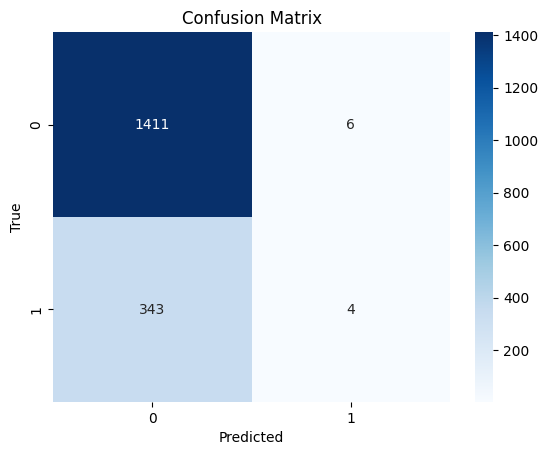

'\n# ROC Curve\nfpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])\nroc_auc = auc(fpr, tpr)\n\nplt.figure()\nplt.plot(fpr, tpr, color=\'darkorange\', lw=2, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver Operating Characteristic\')\nplt.legend(loc="lower right")\nplt.show()\n\n# Precision-Recall Curve\nprecision, recall, _ = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])\n\nplt.figure()\nplt.plot(recall, precision, color=\'blue\', lw=2, label=\'Precision-Recall curve\')\nplt.xlabel(\'Recall\')\nplt.ylabel(\'Precision\')\nplt.title(\'Precision-Recall Curve\')\nplt.legend(loc="lower left")\nplt.show()\n'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

'''
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
'''
